# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load dataset
path = "/content/marketing_campaign.csv"
data = pd.read_csv(path, sep='\t')

# Showing the first few lines
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

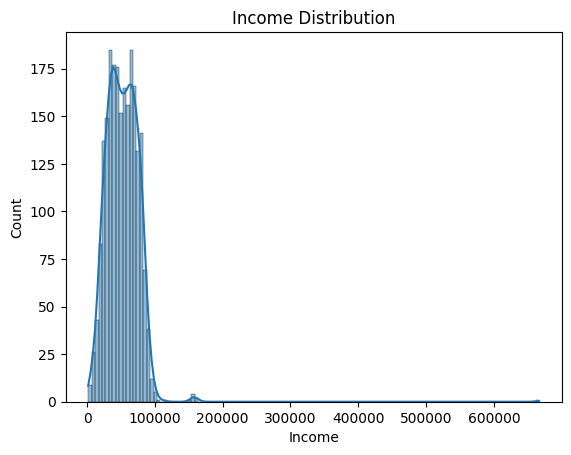

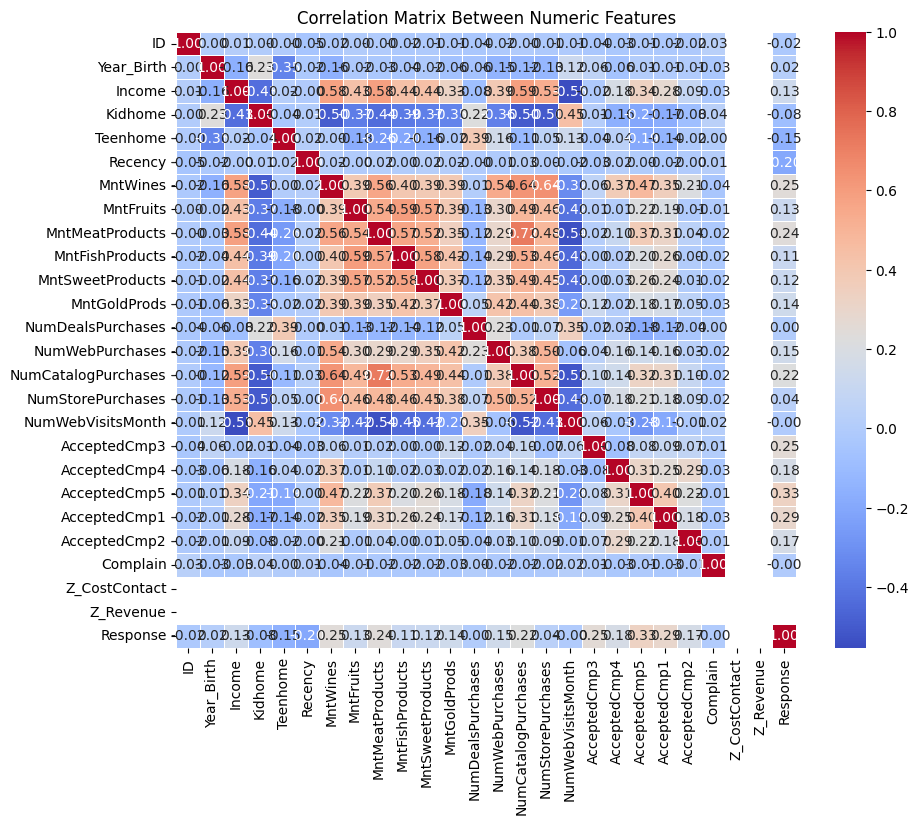

In [ ]:
# Check the dataset structure
data.info()

# Descriptive statistics
data.describe()

# Check missing values
missing_data = data.isnull().sum()
print(missing_data)

# Data distribution
sns.histplot(data['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

# Feature correlation
# Choose only numeric column from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation between numeric columns
correlation_matrix = numeric_data.corr()

# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Numeric Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Removing duplicate data
data.drop_duplicates(inplace=True)

# Calculates age based on birth year if 'Year_Birth' column exists
current_year = 2025
data['Age'] = current_year - data['Year_Birth']

# Handling missing values ​​in the Age column
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill in missing values ​​with median

# Check the age result
print(data[['Age', 'Year_Birth']].head())

# Handling missing values ​​with mean imputation for numeric columns
imputer = SimpleImputer(strategy='mean')
data[['Income', 'Age']] = imputer.fit_transform(data[['Income', 'Age']])

# Normalization or data standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts']])

# Encoding categorical data
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

# Handling outliers with Z-Score
z_scores = np.abs(stats.zscore(data[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts']]))
data_no_outliers = data[(z_scores < 3).all(axis=1)]


   Age  Year_Birth
0   68        1957
1   71        1954
2   60        1965
3   41        1984
4   44        1981


<ipython-input-19-8f0a5b82de28>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill in missing values ​​with median


In [ ]:
z_scores

,Income,Age,MntWines,MntFruits,MntMeatProducts
0,0.235327,0.985345,0.983781,1.551577,1.679702
1,0.235826,1.235733,0.870479,0.636301,0.713225
2,0.773633,0.317643,0.362723,0.570804,0.177032
3,1.022732,1.268149,0.870479,0.560857,0.651187
4,0.241519,1.017761,0.389085,0.419916,0.216914
...,...,...,...,...,...
2235,0.358568,0.150717,1.203678,0.419916,0.066692
2236,0.470064,1.903435,0.303291,0.661449,0.606873
2237,0.189106,1.017761,1.795020,0.545656,0.221789
2238,0.679035,1.068807,0.368666,0.092992,0.208495


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Training a KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding cluster results to the dataset
data['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score: 0.3353414600444429


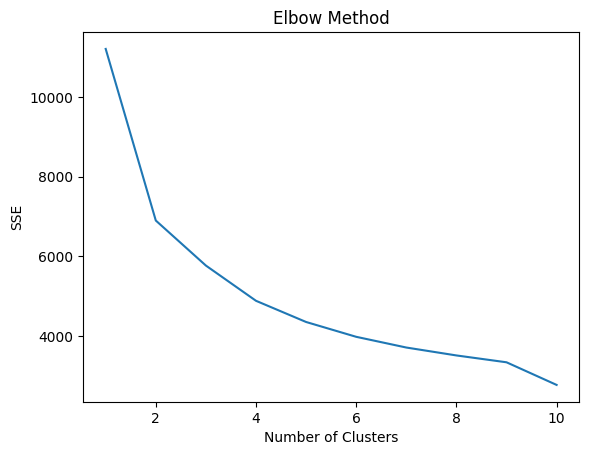

In [ ]:
# Calculating Silhouette Score
sil_score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Using PCA for feature selection (dimension reduction)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Training a KMeans model with selected features (PCA)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data_pca)

# Adding cluster results to the dataset
data['Cluster_PCA'] = clusters_pca

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Cluster,Cluster_PCA
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68.0,2,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71.0,0,2
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60.0,1,2
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41.0,0,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,58.0,1,1
2236,4001,1946,4,5,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,79.0,1,2
2237,7270,1981,2,2,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,44.0,1,1
2238,8235,1956,3,5,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,69.0,1,2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

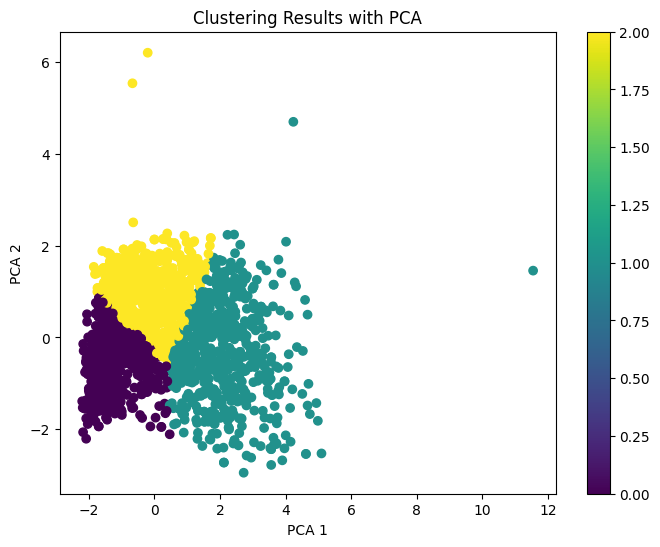

In [ ]:
# Clustering visualization with PCA projection
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster_PCA'], cmap='viridis')
plt.title('Clustering Results with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Displays descriptive statistics for each cluster
cluster_analysis = data.groupby('Cluster')[['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts']].mean()
print(cluster_analysis)

               Income        Age    MntWines  MntFruits  MntMeatProducts
Cluster                                                                 
0        36208.693332  52.900169   65.753807   6.792724        33.462775
1        65646.968059  63.390977  552.804511  22.600000       193.433083
2        77811.536270  53.923664  599.185751  91.244275       523.618321


Tulis hasil interpretasinya di sini.
1. Cluster 0: Konsumen dalam cluster ini cenderung terdiri dari konsumen dengan rata-rata usia 52.9 tahun dan memiliki pendapatan lebih rendah daripada cluster lainnya. Konsumen dengan pendapatan lebih rendah dan cenderung membeli barang yang lebih terjangkau. Mereka bisa lebih berhati-hati dalam pengeluaran dan lebih fokus pada kebutuhan dasar.
2. Cluster 1: Konsumen dalam cluster ini cenderung lebih tua dengan rata-rata usia 63 tahun dan memiliki pendapatan lebih tinggi. Kelompok ini memiliki pengeluaran lebih besar untuk produk premium seperti anggur dan daging, hal ini menunjukkan bahwa mereka lebih mampu untuk membeli barang-barang mahal. Dapat disimpulkan bahwa konsumen dalam cluster ini lebih tua dan lebih kaya, dengan pengeluaran tinggi untuk anggur dan produk premium lainnya. Mereka mungkin lebih mengutamakan kenyamanan dan kemewahan.
3. Cluster 2: Konsumen dalam cluster ini memiliki pendapatan paling tinggi dan pengeluaran yang sangat besar untuk anggur, buah, dan daging. Kelompok ini sepertinya terdiri dari individu yang sangat mampu secara finansial dan cenderung memilih barang-barang berkualitas tinggi dan premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
data.to_csv('clustered_customer_data.csv', index=False)